In [202]:
import numpy as np
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
# Automatic Gain Control=Checked,IR PA (mA)=10,Red PA (mA)=10,IR LED Range (mA)=51,Red LED Range (mA)=51,ALC + FDM=Checked,
# Sample Rate (Hz)=100,Pulse Width (usec)=400,ADC Range (nA)=32768,FIFO Rolls on Full=Checked,FIFO Almost Full=17,Sample 
# Averaging=1,IA Gain=5,ECG Gain=8,Sample Rate=200,Adaptive Filter=Checked,Notch Freq=60,Cutoff Freq=50,

In [209]:
def convert_to_sec(t):
    """This function converts the string in format yyyy-mm-dd hh:mm:ss:SSS to a float
    with the format ss:SSS. Only converts from minutes down to seconds. Not for >= 1 hr
    long data.

    Args:
        t (str): datetime string with format yyyy-mm-dd hh:mm:ss:SSS

    Returns:
        total (float): seconds calculated from mm:ss.SSS
    """
    t = t[14:]
    min = float(t[:t.find(":")])
    sec = float(t[t.find(":")+1:])
    total = (min*60)+sec
    return total

def peak_finder_and_plot(data, time):
    """finds the peaks of a dataset and plots the data

    Args:
        data (list/list-like): the y-axis values of the dataset
        time (list/list-like): the x-axis time values of the dataset (should be same shape as data) 

    Returns:
        list: list containing the indexes of all of the peaks in the dataset (no minimum peaks, just maxes)
    """
    MIN_WIDTH = 20
    MAX_WIDTH = 200
    peaks = find_peaks(data, width=(MIN_WIDTH, MAX_WIDTH))[0]
    
    # fixes edge case where max of a peak is found twice in same peak.  Credit: @user3148225 on Stack Overflow
    usedValues = set()
    newList = []

    for v in peaks:
        if v not in usedValues:
            newList.append(v)

            for lv in range(v - MIN_WIDTH, v + MIN_WIDTH + 1):
                usedValues.add(lv)
    
    
    peaks = list(newList)
    
    #plotting
    plt.figure(figsize=(12,4))
    plt.plot(time, data, label = "Signal")
    plt.plot(time[peaks], data[peaks], "x", label = "peaks")
    plt.legend()
    plt.show()
    return peaks

In [208]:
# CSV # 1
#df = pd.read_csv("C:\data\honors project ppg data\ECPPG_2023-10-21_21-29-57.csv") #Karston
df = pd.read_csv("C:\\Users\pazul\Documents\BMEN 207\Honors Project\Coding\data\ECPPG_2023-10-21_21-29-57.csv") #Pablo

# CSV # 2
#df = pd.read_csv("C:\\Users\pazul\Documents\BMEN 207\Honors Project\Coding\data\ECPPG_2023-10-21_23-45-37.csv") # Pablo

# CSV # 3
#df = pd.read_csv("C:\\Users\pazul\Documents\BMEN 207\Honors Project\Coding\data\ECPPG_2023-10-21.csv") # Pablo
df.head

<bound method NDFrame.head of                          Time   Sample Count   IR Count   Red Count   Raw ECG  \
0     2023-10-21 21:30:51.750          11728     233049      209594     -7427   
1     2023-10-21 21:30:51.782          11729     233094      209607     -7419   
2     2023-10-21 21:30:51.783          11730     233090      209595     -7526   
3     2023-10-21 21:30:51.783          11731     233113      209598     -7379   
4     2023-10-21 21:30:51.783          11732     233142      209611     -7651   
...                       ...            ...        ...         ...       ...   
5020  2023-10-21 21:31:16.861          16748     237060      206019      3901   
5021  2023-10-21 21:31:16.861          16749     237052      206017      3765   
5022  2023-10-21 21:31:16.861          16750     237040      205990      3965   
5023  2023-10-21 21:31:16.861          16751     237056      205995      3713   
5024  2023-10-21 21:31:16.861          16752     237052      205999      3722  

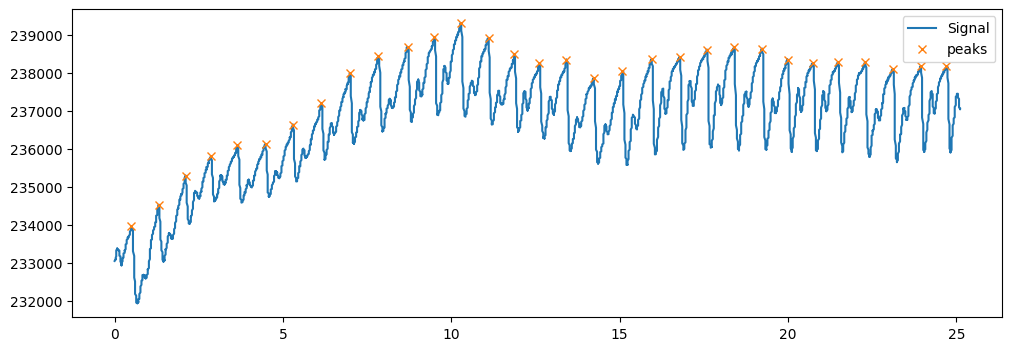

In [207]:
time = np.array([convert_to_sec(x) for x in df["Time"]]) - convert_to_sec(df["Time"][0])
IR_Count = df[" IR Count"]
peaks = peak_finder_and_plot(IR_Count, time)
# print(peaks)
# widths = peak_widths(IR_Count, peaks=peaks)
# print(widths)

In [206]:
peak_times = sorted(list(set(np.round(time[peaks], 3))))
peak_vals = IR_Count[peaks]

# print(peak_vals)
# print(peak_times)

diffs = np.diff(peak_times)

#average over the whole timeframe
avg_bpm = 60*(1/np.mean(diffs))

#moving average every 5 heartbeats
try:
    bpms = [60*(1/np.mean(diffs[i:i+5])) for i in range(len(diffs) - 5)]
except IndexError:
    print("Use more than 5 heartbeats for your data. Preferably way more!")
print(f'Average BPM over time interval: {avg_bpm:.2f}')
print("BPM Moving Average with window length of 5 Heartbeats:")
print(np.round(bpms, 2))

Average BPM over time interval: 74.33
BPM Moving Average with window length of 5 Heartbeats:
[75.06 75.66 74.44 72.69 71.68 71.12 71.58 72.2  72.71 74.39 76.79 76.26
 76.18 75.64 73.3  71.6  71.62 72.18 72.17 74.39 76.2  77.38 76.73 77.4
 75.62]
